# EM Algorithm

In [2]:
from numpy import *
import numpy as np
import random
import copy
import matplotlib.pyplot  as plt

In [3]:
#生成sigma相同,均值不同的樣本
def generate_data(n, mu1, mu2, sigma):
    X1 = np.random.normal(mu1, sigma, size = (n,1))
    X2 = np.random.normal(mu2, sigma, size = (n,1))
    
    X = zeros((N, 2))
    for i in range(N):
        temp = random.uniform(0,1)
        if(temp > 0.5):
            X[i] = X1[i], 1
        else:
            X[i] = X2[i], 2
    return X

In [4]:
N = 200
Mu1 = 30
Mu2 = 40
Sigma = 5
X = generate_data(N, Mu1, Mu2, Sigma)
#X

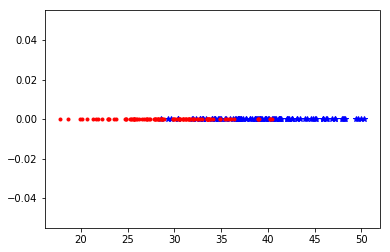

In [5]:
mask1 = (X[:,1] == 1)
mask2 = (X[:,1] == 2)
plt.plot(X[mask2, 0], zeros(sum(mask2 + 0)), '*b')
plt.plot(X[mask1, 0], zeros(sum(mask1 + 0)), '.r')
plt.show()

In [6]:
EPS = 0.0001

def EM_Test(x, sigma):
    '''
    x:array(n,1)
    sigma:sigma of 2 normal distribution
    2 class
    '''    
    k = 2
    n = len(x)
    mu = np.random.rand(k, 1)
    posterior = zeros((n,2))
    dominator = 0
    numerator = 0

    for iter in range(1000):
        print("%d, mu1 = %d, mu2 = %d\n" %(iter, mu[0], mu[1]))  
        
        # E-step 找到後驗機率:第i個樣本，被歸類於第j個cluster的機率
        # posterior[i, j] = P(i, j, theta) / sum_j( P(i, j, theta) )
        for i in range(n):
            dominator = 0
            for j in range(k):
                dominator = dominator + np.exp(-1.0 / (2.0 * sigma**2) * (x[i] - mu[j])**2)
                
            for j in range(k):
                numerator = np.exp(-1.0 / (2.0 * sigma**2) * (x[i] - mu[j])**2)
                posterior[i, j] = numerator / dominator
        oldMu = copy.deepcopy(mu)
        
        # M-step 固定後驗機率下，最大化likelihood
        for j in range(k):
            numerator = 0
            dominator = 0
            for i in range(n):
                numerator = numerator + posterior[i, j] * x[i]
                dominator = dominator + posterior[i, j]
            mu[j] = numerator / dominator
            
        #print( (abs(Miu - oldMiu)).sum() )
        if (abs(mu - oldMu)).sum() < EPS:
            print(mu, iter)
            break


In [7]:
X = generate_data(N, Mu1, Mu2, Sigma)
EM_Test(X[:,0], Sigma)

0, mu1 = 0, mu2 = 0

1, mu1 = 35, mu2 = 35

2, mu1 = 35, mu2 = 34

3, mu1 = 35, mu2 = 34

4, mu1 = 36, mu2 = 33

5, mu1 = 38, mu2 = 32

6, mu1 = 39, mu2 = 30

7, mu1 = 40, mu2 = 29

8, mu1 = 40, mu2 = 29

9, mu1 = 40, mu2 = 29

10, mu1 = 40, mu2 = 29

11, mu1 = 40, mu2 = 29

12, mu1 = 40, mu2 = 29

13, mu1 = 40, mu2 = 29

14, mu1 = 40, mu2 = 29

15, mu1 = 40, mu2 = 29

16, mu1 = 40, mu2 = 29

17, mu1 = 40, mu2 = 29

18, mu1 = 40, mu2 = 29

19, mu1 = 40, mu2 = 29

20, mu1 = 40, mu2 = 29

[[40.29277877]
 [29.31997116]] 20
